In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
# Load your datase
df = pd.read_csv("day_approach_maskedID_timeseries.csv")

# Esplorazione del Dataset

Analizziamo le caratteristiche principali del dataset per comprenderne la struttura e il contenuto.

In [4]:
# Informazioni di base sul dataset
print("📊 INFORMAZIONI GENERALI SUL DATASET")
print("=" * 50)
print(f"Dimensioni del dataset: {df.shape[0]} righe × {df.shape[1]} colonne")
print(f"Memoria utilizzata: {df.memory_usage().sum() / 1024:.2f} KB")
print("\n" + "=" * 50)
print("PRIME 5 RIGHE DEL DATASET:")
print("=" * 50)
df.head()

📊 INFORMAZIONI GENERALI SUL DATASET
Dimensioni del dataset: 42766 righe × 73 colonne
Memoria utilizzata: 24390.11 KB

PRIME 5 RIGHE DEL DATASET:


,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4


In [5]:
# Informazioni dettagliate sulle colonne
print("🔍 INFORMAZIONI DETTAGLIATE SULLE COLONNE")
print("=" * 50)
print("Info del dataset:")
df.info()

print("\n" + "=" * 50)
print("NOMI DELLE COLONNE:")
print("=" * 50)
print(f"Numero totale di colonne: {len(df.columns)}")
print("\nElenco delle colonne:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

🔍 INFORMAZIONI DETTAGLIATE SULLE COLONNE
Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1      

In [6]:
# Analisi dei tipi di dati e valori mancanti
print("📈 ANALISI DEI TIPI DI DATI E VALORI MANCANTI")
print("=" * 60)

# Conteggio dei tipi di dati
data_types = df.dtypes.value_counts()
print("Distribuzione dei tipi di dati:")
for dtype, count in data_types.items():
    print(f"  {dtype}: {count} colonne")

print(f"\n📊 STATISTICHE SUI VALORI MANCANTI")
print("=" * 60)
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Mostra solo le colonne con valori mancanti
missing_summary = pd.DataFrame({
    'Valori_mancanti': missing_data,
    'Percentuale': missing_percentage
}).round(2)

missing_cols = missing_summary[missing_summary['Valori_mancanti'] > 0].sort_values('Valori_mancanti', ascending=False)

if len(missing_cols) > 0:
    print(f"Colonne con valori mancanti ({len(missing_cols)} su {len(df.columns)}):")
    print(missing_cols)
else:
    print("✅ Nessun valore mancante nel dataset!")

📈 ANALISI DEI TIPI DI DATI E VALORI MANCANTI
Distribuzione dei tipi di dati:
  float64: 70 colonne
  int64: 3 colonne

📊 STATISTICHE SUI VALORI MANCANTI
✅ Nessun valore mancante nel dataset!


In [7]:
# Statistiche descrittive
print("📊 STATISTICHE DESCRITTIVE DELLE VARIABILI NUMERICHE")
print("=" * 60)

# Statistiche di base
stats = df.describe()
print("Statistiche di base (prime 10 colonne):")
print(stats.iloc[:, :10].round(3))

print(f"\n🎯 INFORMAZIONI AGGIUNTIVE")
print("=" * 60)

# Identifica colonne categoriche/discrete vs continue
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Variabili numeriche: {len(numeric_cols)}")

# Controlla se ci sono colonne che sembrano categoriche (pochi valori unici)
potentially_categorical = []
for col in numeric_cols:
    unique_values = df[col].nunique()
    if unique_values <= 10:  # Soglia arbitraria per identificare variabili categoriche
        potentially_categorical.append((col, unique_values))

if potentially_categorical:
    print(f"\nVariabili che potrebbero essere categoriche (≤10 valori unici):")
    for col, unique_count in potentially_categorical[:10]:  # Mostra le prime 10
        print(f"  {col}: {unique_count} valori unici")
    if len(potentially_categorical) > 10:
        print(f"  ... e altre {len(potentially_categorical) - 10} variabili")

📊 STATISTICHE DESCRITTIVE DELLE VARIABILI NUMERICHE
Statistiche di base (prime 10 colonne):
       nr. sessions   total km    km Z3-4  km Z5-T1-T2  km sprinting  \
count     42766.000  42766.000  42766.000    42766.000     42766.000   
mean          0.830      7.038      0.691        0.580         0.073   
std           0.581      7.473      2.318        1.812         0.483   
min           0.000      0.000      0.000        0.000         0.000   
25%           0.000      0.000      0.000        0.000         0.000   
50%           1.000      6.000      0.000        0.000         0.000   
75%           1.000     12.000      0.000        0.000         0.000   
max           2.000     55.900     42.200       48.000        40.000   

       strength training  hours alternative  perceived exertion  \
count          42766.000          42766.000           42766.000   
mean               0.116              0.163               0.248   
std                0.326              0.550               

📈 VISUALIZZAZIONI ESPLORATIVE


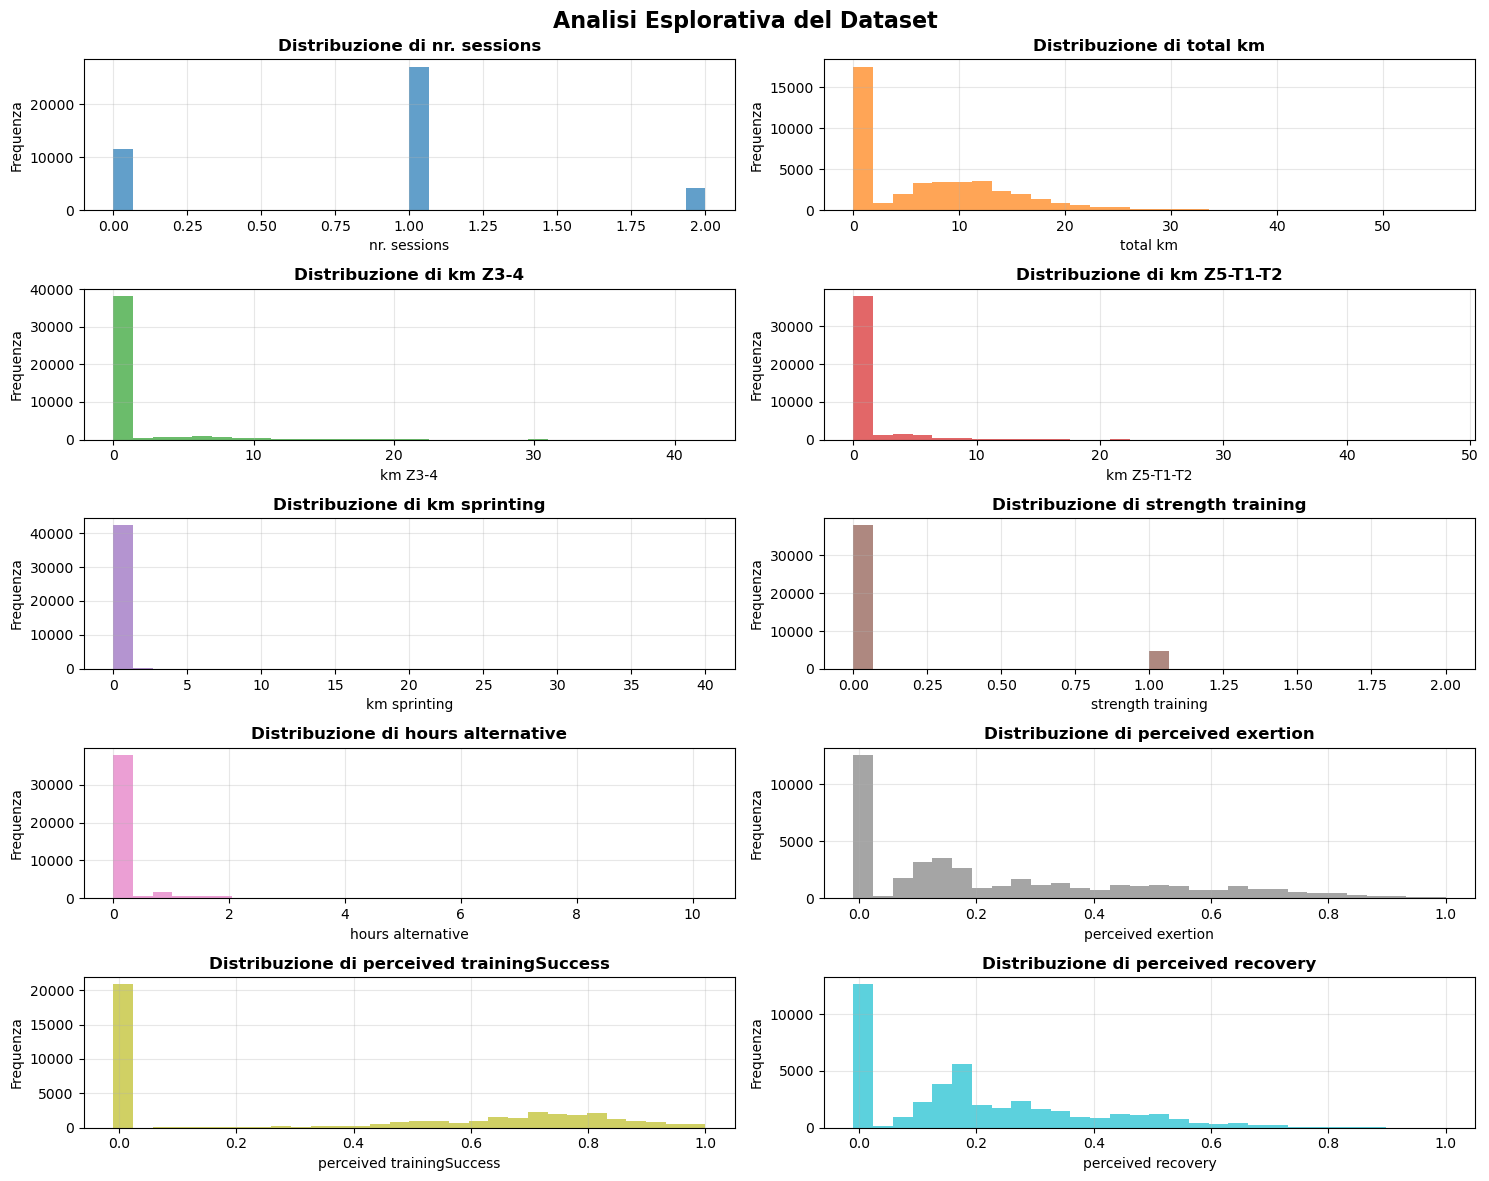

In [8]:
# Visualizzazioni esplorative
print("📈 VISUALIZZAZIONI ESPLORATIVE")
print("=" * 60)

# Configurazione matplotlib
plt.style.use('default')
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
fig.suptitle('Analisi Esplorativa del Dataset', fontsize=16, fontweight='bold')

# 1. Distribuzione dei valori per alcune colonne numeriche (prime 4 colonne non-ID)
numeric_cols = df.select_dtypes(include=[np.number]).columns
sample_cols = [col for col in numeric_cols if 'id' not in col.lower()][:10]

for i, col in enumerate(sample_cols):
    row, col_idx = i // 2, i % 2
    axes[row, col_idx].hist(df[col].dropna(), bins=30, alpha=0.7, color=f'C{i}')
    axes[row, col_idx].set_title(f'Distribuzione di {col}', fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequenza')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [9]:
# Analisi dei valori zero in total_km
print("🔍 ANALISI DEI VALORI ZERO IN 'total_km'")
print("=" * 60)

# Conta i valori zero in total_km
zero_km = df[df['total km'] == 0]
non_zero_km = df[df['total km'] > 0]

print(f"Giorni con total_km = 0: {len(zero_km):,} ({len(zero_km)/len(df)*100:.1f}%)")
print(f"Giorni con total_km > 0: {len(non_zero_km):,} ({len(non_zero_km)/len(df)*100:.1f}%)")
print(f"Giorni totali: {len(df):,}, should be equal to {len(zero_km) + len(non_zero_km):,}")

print(f"\n📊 RELAZIONE TRA total_km = 0 E nr. sessions")
print("=" * 60)

# Analizza la relazione con nr. sessions
sessions_when_zero_km = zero_km['nr. sessions'].value_counts().sort_index()
print("Distribuzione di 'nr. sessions' quando total_km = 0:")
for sessions, count in sessions_when_zero_km.items():
    percentage = count / len(zero_km) * 100
    print(f"  {sessions} sessioni: {count:,} giorni ({percentage:.1f}%)")

# Controlla se ci sono giorni con sessions > 0 ma total_km = 0
sessions_but_no_km = zero_km[zero_km['nr. sessions'] > 0]
print(f"\n🚨 GIORNI ANOMALI: {len(sessions_but_no_km)} giorni con sessioni > 0 ma total_km = 0")
if len(sessions_but_no_km) > 0:
    print("Distribuzione delle sessioni in questi giorni anomali:")
    print(sessions_but_no_km['nr. sessions'].value_counts().sort_index())

# There are session != 0 but total_km = 0 because strength/alternative trainings

🔍 ANALISI DEI VALORI ZERO IN 'total_km'
Giorni con total_km = 0: 17,307 (40.5%)
Giorni con total_km > 0: 25,459 (59.5%)
Giorni totali: 42,766, should be equal to 42,766

📊 RELAZIONE TRA total_km = 0 E nr. sessions
Distribuzione di 'nr. sessions' quando total_km = 0:
  0.0 sessioni: 11,476 giorni (66.3%)
  1.0 sessioni: 5,341 giorni (30.9%)
  2.0 sessioni: 490 giorni (2.8%)

🚨 GIORNI ANOMALI: 5831 giorni con sessioni > 0 ma total_km = 0
Distribuzione delle sessioni in questi giorni anomali:
nr. sessions
1.0    5341
2.0     490
Name: count, dtype: int64


📊 VISUALIZZAZIONI DEI PATTERN


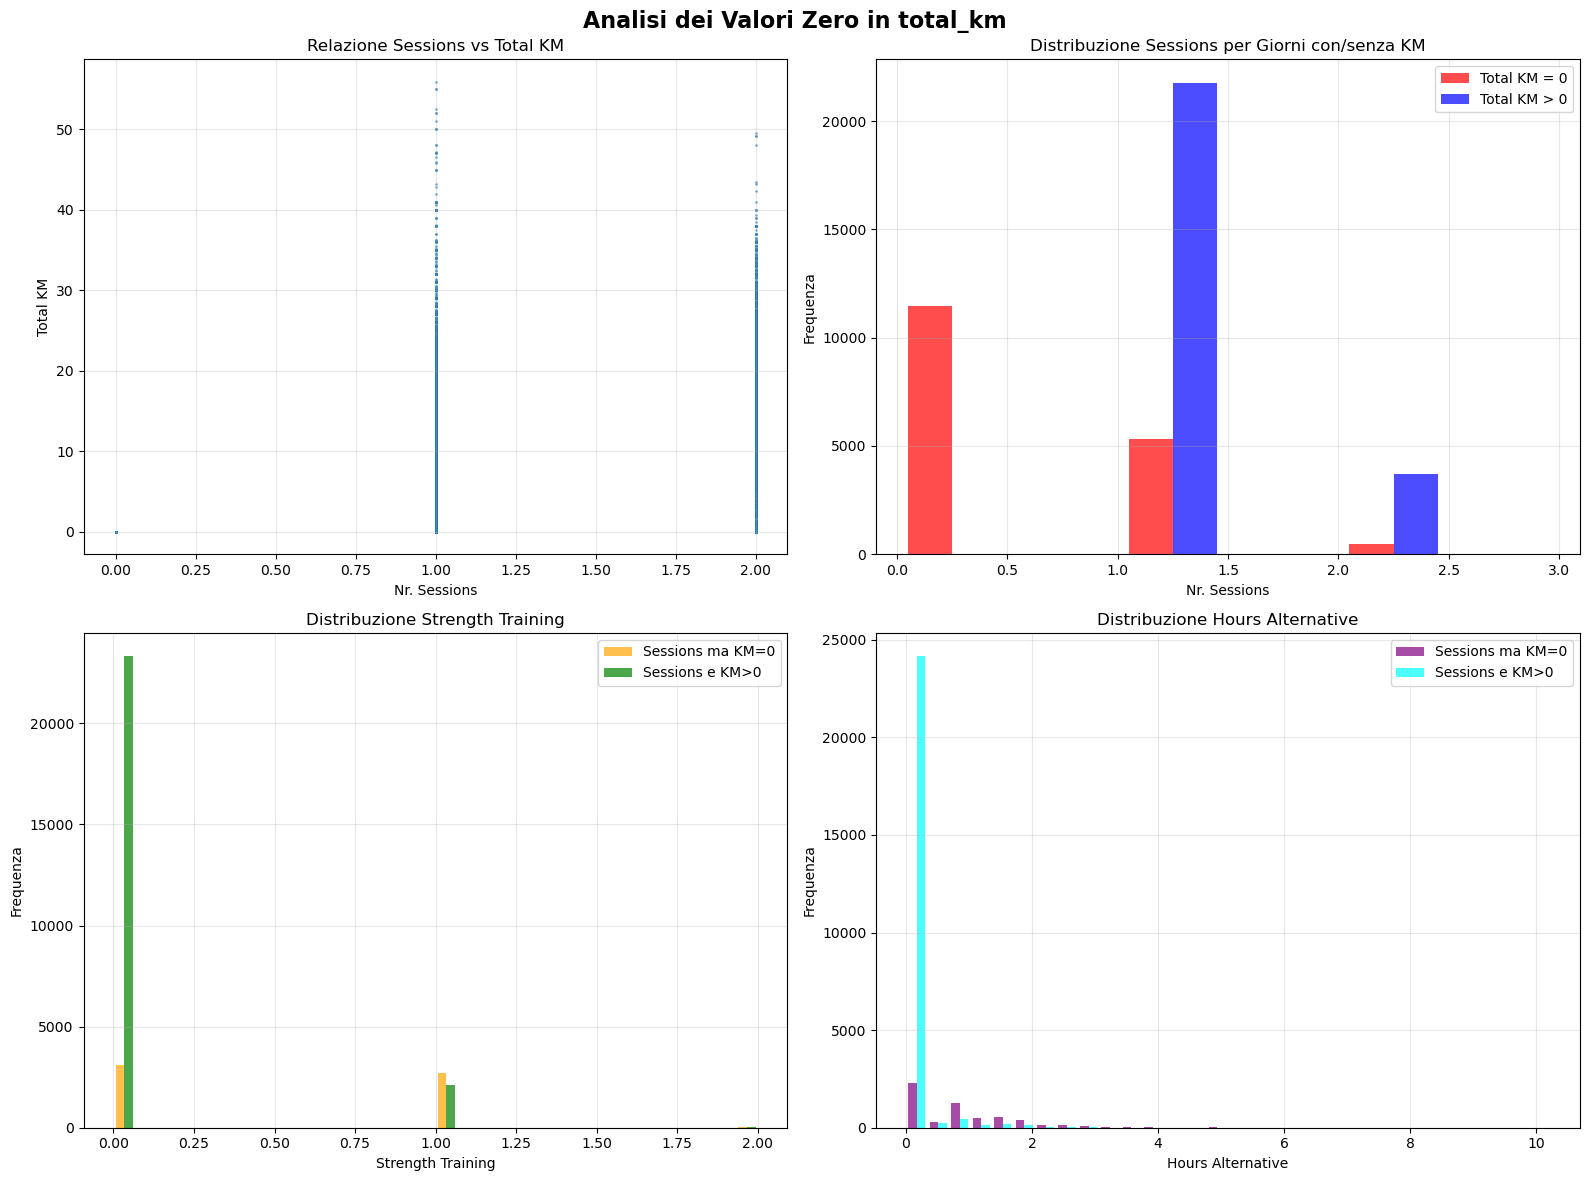

In [10]:
# Visualizzazioni per comprendere i pattern
print("📊 VISUALIZZAZIONI DEI PATTERN")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analisi dei Valori Zero in total_km', fontsize=16, fontweight='bold')

# 1. Scatter plot: nr. sessions vs total km
axes[0, 0].scatter(df['nr. sessions'], df['total km'], alpha=0.5, s=1)
axes[0, 0].set_xlabel('Nr. Sessions')
axes[0, 0].set_ylabel('Total KM')
axes[0, 0].set_title('Relazione Sessions vs Total KM')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribuzione delle sessioni per giorni con/senza km
no_km_sessions = df[df['total km'] == 0]['nr. sessions']
with_km_sessions = df[df['total km'] > 0]['nr. sessions']

axes[0, 1].hist([no_km_sessions, with_km_sessions], 
                bins=np.arange(0, 3.5, 0.5), 
                alpha=0.7, 
                label=['Total KM = 0', 'Total KM > 0'],
                color=['red', 'blue'])
axes[0, 1].set_xlabel('Nr. Sessions')
axes[0, 1].set_ylabel('Frequenza')
axes[0, 1].set_title('Distribuzione Sessions per Giorni con/senza KM')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Analisi strength training nei giorni anomali
anomali = df[(df['nr. sessions'] > 0) & (df['total km'] == 0)]
normali = df[(df['nr. sessions'] > 0) & (df['total km'] > 0)]

if 'strength training' in df.columns:
    axes[1, 0].hist([anomali['strength training'], normali['strength training']], 
                    bins=30, 
                    alpha=0.7, 
                    label=['Sessions ma KM=0', 'Sessions e KM>0'],
                    color=['orange', 'green'])
    axes[1, 0].set_xlabel('Strength Training')
    axes[1, 0].set_ylabel('Frequenza')
    axes[1, 0].set_title('Distribuzione Strength Training')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# 4. Analisi hours alternative nei giorni anomali
if 'hours alternative' in df.columns:
    axes[1, 1].hist([anomali['hours alternative'], normali['hours alternative']], 
                    bins=30, 
                    alpha=0.7, 
                    label=['Sessions ma KM=0', 'Sessions e KM>0'],
                    color=['purple', 'cyan'])
    axes[1, 1].set_xlabel('Hours Alternative')
    axes[1, 1].set_ylabel('Frequenza')
    axes[1, 1].set_title('Distribuzione Hours Alternative')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Riepilogo finale e osservazioni
print("📋 RIEPILOGO DELL'ESPLORAZIONE DEL DATASET")
print("=" * 70)

print("🔍 CARATTERISTICHE PRINCIPALI:")
print(f"   • Dimensioni: {df.shape[0]:,} righe × {df.shape[1]} colonne")
print(f"   • Memoria utilizzata: {df.memory_usage().sum() / 1024:.2f} KB")
print(f"   • Nessun valore mancante")
print(f"   • Tipi di dati: {df.dtypes.value_counts().to_dict()}")

print(f"\n📊 OSSERVAZIONI DALLE VISUALIZZAZIONI:")
print("   • Il dataset sembra contenere dati di allenamento/attività fisica")
print("   • Variabili come 'total km', 'nr. sessions' suggeriscono dati di fitness")
print("   • Molte variabili hanno distribuzioni concentrate verso valori bassi")
print("   • Esistono correlazioni moderate tra alcune variabili (es. perceived variables)")

print(f"\n🎯 PROSSIMI PASSI SUGGERITI:")
print("   1. Analizzare le serie temporali se presenti colonne di date")
print("   2. Investigare outliers nelle distribuzioni")
print("   3. Analizzare correlazioni più specifiche per gruppi di variabili")
print("   4. Considerare normalizzazione/standardizzazione per analisi future")
print("   5. Identificare variabili target per eventuali modelli predittivi")

# Salva un piccolo campione per riferimento futuro
print(f"\n💾 CAMPIONE DEI DATI (prime 3 righe, prime 10 colonne):")
print("=" * 70)
sample_data = df.iloc[:3, :10]
print(sample_data)

📋 RIEPILOGO DELL'ESPLORAZIONE DEL DATASET
🔍 CARATTERISTICHE PRINCIPALI:
   • Dimensioni: 42,766 righe × 73 colonne
   • Memoria utilizzata: 24390.11 KB
   • Nessun valore mancante
   • Tipi di dati: {dtype('float64'): 70, dtype('int64'): 3}

📊 OSSERVAZIONI DALLE VISUALIZZAZIONI:
   • Il dataset sembra contenere dati di allenamento/attività fisica
   • Variabili come 'total km', 'nr. sessions' suggeriscono dati di fitness
   • Molte variabili hanno distribuzioni concentrate verso valori bassi
   • Esistono correlazioni moderate tra alcune variabili (es. perceived variables)

🎯 PROSSIMI PASSI SUGGERITI:
   1. Analizzare le serie temporali se presenti colonne di date
   2. Investigare outliers nelle distribuzioni
   3. Analizzare correlazioni più specifiche per gruppi di variabili
   4. Considerare normalizzazione/standardizzazione per analisi future
   5. Identificare variabili target per eventuali modelli predittivi

💾 CAMPIONE DEI DATI (prime 3 righe, prime 10 colonne):
   nr. sessions

In [12]:
# Visualizzazione completa delle prime 10 righe con tutte le colonne
print("🔍 VISUALIZZAZIONE COMPLETA DELLE PRIME 10 RIGHE")
print("=" * 70)

# Configurazione per mostrare tutte le colonne
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print(f"Dataset con {df.shape[1]} colonne:")

display(df.iloc[79:100])
#display(df.head())

# Ripristina le impostazioni predefinite
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

🔍 VISUALIZZAZIONE COMPLETA DELLE PRIME 10 RIGHE
Dataset con 73 colonne:


,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,nr. sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,km sprinting.1,strength training.1,hours alternative.1,perceived exertion.1,perceived trainingSuccess.1,perceived recovery.1,nr. sessions.2,total km.2,km Z3-4.2,km Z5-T1-T2.2,km sprinting.2,strength training.2,hours alternative.2,perceived exertion.2,perceived trainingSuccess.2,perceived recovery.2,nr. sessions.3,total km.3,km Z3-4.3,km Z5-T1-T2.3,km sprinting.3,strength training.3,hours alternative.3,perceived exertion.3,perceived trainingSuccess.3,perceived recovery.3,nr. sessions.4,total km.4,km Z3-4.4,km Z5-T1-T2.4,km sprinting.4,strength training.4,hours alternative.4,perceived exertion.4,perceived trainingSuccess.4,perceived recovery.4,nr. sessions.5,total km.5,km Z3-4.5,km Z5-T1-T2.5,km sprinting.5,strength training.5,hours alternative.5,perceived exertion.5,perceived trainingSuccess.5,perceived recovery.5,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
79,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,1.0,7.4,3.4,0.0,0.0,0.0,0.00,0.10,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.17,0.09,0.00,0.16,1.0,4.0,0.0,0.0,0.0,0.0,0.00,0.10,0.00,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,5.1,0.0,1.1,0.0,0.0,0.00,0.10,0.00,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,0,0,79
80,1.0,7.4,3.4,0.0,0.0,0.0,0.00,0.10,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.17,0.09,0.00,0.16,1.0,4.0,0.0,0.0,0.0,0.0,0.00,0.10,0.00,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,5.1,0.0,1.1,0.0,0.0,0.00,0.10,0.00,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.18,0,0,80
81,1.0,0.0,0.0,0.0,0.0,0.0,1.17,0.09,0.00,0.16,1.0,4.0,0.0,0.0,0.0,0.0,0.00,0.10,0.00,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,5.1,0.0,1.1,0.0,0.0,0.00,0.10,0.00,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.18,1.0,4.7,0.0,0.0,0.7,0.0,0.00,0.10,0.00,0.18,0,0,81
82,1.0,4.0,0.0,0.0,0.0,0.0,0.00,0.10,0.00,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,5.1,0.0,1.1,0.0,0.0,0.00,0.10,0.00,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.18,1.0,4.7,0.0,0.0,0.7,0.0,0.00,0.10,0.00,0.18,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.09,0.00,0.17,0,0,82
83,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,5.1,0.0,1.1,0.0,0.0,0.00,0.10,0.00,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.18,1.0,4.7,0.0,0.0,0.7,0.0,0.00,0.10,0.00,0.18,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.09,0.00,0.17,1.0,6.7,0.0,2.7,0.0,0.0,0.00,0.11,0.00,0.18,0,0,83
84,1.0,5.1,0.0,1.1,0.0,0.0,0.00,0.10,0.00,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.18,1.0,4.7,0.0,0.0,0.7,0.0,0.00,0.10,0.00,0.18,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.09,0.00,0.17,1.0,6.7,0.0,2.7,0.0,0.0,0.00,0.11,0.00,0.18,1.0,0.0,0.0,0.0,0.0,0.0,1.25,0.10,0.00,0.17,0,0,84
85,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.18,1.0,4.7,0.0,0.0,0.7,0.0,0.00,0.10,0.00,0.18,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.09,0.00,0.17,1.0,6.7,0.0,2.7,0.0,0.0,0.00,0.11,0.00,0.18,1.0,0.0,0.0,0.0,0.0,0.0,1.25,0.10,0.00,0.17,1.0,4.7,0.0,0.0,0.7,0.0,0.00,0.12,0.00,0.16,0,0,85
86,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.18,1.0,4.7,0.0,0.0,0.7,0.0,0.00,0.10,0.00,0.18,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.09,0.00,0.17,1.0,6.7,0.0,2.7,0.0,0.0,0.00,0.11,0.00,0.18,1.0,0.0,0.0,0.0,0.0,0.0,1.25,0.10,0.00,0.17,1.0,4.7,0.0,0.0,0.7,0.0,0.00,0.12,0.00,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,0,0,86
87,1.0,4.7,0.0,0.0,0.7,0.0,0.00,0.10,0.00,0.18,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.09,0.00,0.17,1.0,6.7,0.0,2.7,0.0,0.0,0.00,0.11,0.00,0.18,1.0,0.0,0.0,0.0,0.0,0.0,1.25,0.10,0.00,0.17,1.0,4.7,0

# Analisi Correlazioni con Possibilità di Infortuni

Analizziamo le relazioni tra le variabili del dataset e potenziali indicatori di infortuni o sovraccarico.

In [13]:
# Analisi aggregata: Km totali per atleta vs Infortuni
print("🏃‍♂️ ANALISI AGGREGATA: KM TOTALI PER ATLETA VS INFORTUNI")
print("=" * 70)

# Prima identifichiamo le colonne ID atleta e injury
print("Ricerca colonne ID atleta e injury...")
id_columns = [col for col in df.columns if 'id' in col.lower() or 'athlete' in col.lower()]
injury_columns = [col for col in df.columns if 'injury' in col.lower() or 'inj' in col.lower()]

print(f"Colonne ID potenziali: {id_columns}")
print(f"Colonne injury potenziali: {injury_columns}")

# Assumiamo che la prima colonna ID sia quella dell'atleta
if id_columns:
    athlete_id_col = id_columns[0]
    print(f"\nUsando '{athlete_id_col}' come ID atleta")
    print(f"Numero di atleti unici: {df[athlete_id_col].nunique()}")
    
    if injury_columns:
        injury_col = injury_columns[0]
        print(f"Usando '{injury_col}' come variabile injury")
        
        # Creiamo diverse finestre temporali per l'aggregazione
        print(f"\n📊 CREAZIONE FINESTRE TEMPORALI PER L'AGGREGAZIONE")
        print("=" * 70)
        
        # Definiamo diverse finestre (numero di giorni precedenti)
        windows = [7, 14, 30]  # 1 settimana, 2 settimane, 1 mese
        
        for window in windows:
            print(f"\n🔍 ANALISI FINESTRA {window} GIORNI:")
            print("-" * 50)
            
            # Creiamo un DataFrame per questa analisi
            analysis_df = df.copy()
            analysis_df = analysis_df.sort_values(['athlete_id', 'date'] if 'date' in df.columns else [athlete_id_col])
            
            # Calcoliamo la somma mobile dei km per ogni atleta
            analysis_df[f'km_sum_{window}d'] = analysis_df.groupby(athlete_id_col)['total km'].rolling(window=window, min_periods=1).sum().reset_index(0, drop=True)
            
            # Correliamo con gli infortuni
            correlation = analysis_df[f'km_sum_{window}d'].corr(analysis_df[injury_col])
            print(f"Correlazione km_{window}d vs injury: {correlation:.3f}")
            
            # Statistiche per giorni con e senza infortuni
            injured_days = analysis_df[analysis_df[injury_col] > 0]
            non_injured_days = analysis_df[analysis_df[injury_col] == 0]
            
            if len(injured_days) > 0:
                print(f"Km medi {window}d prima dell'infortunio: {injured_days[f'km_sum_{window}d'].mean():.2f}")
                print(f"Km medi {window}d giorni senza infortunio: {non_injured_days[f'km_sum_{window}d'].mean():.2f}")
                print(f"Giorni con infortuni: {len(injured_days)} ({len(injured_days)/len(analysis_df)*100:.1f}%)")
            else:
                print("Nessun giorno con infortuni trovato")
    else:
        print("⚠️  Nessuna colonna 'injury' trovata nel dataset")
        print("Colonne disponibili che potrebbero essere correlate:")
        for col in df.columns:
            if any(keyword in col.lower() for keyword in ['pain', 'hurt', 'wellness', 'fatigue', 'recovery']):
                print(f"  - {col}")
else:
    print("⚠️  Nessuna colonna ID atleta trovata nel dataset")
    print("Colonne disponibili:")
    for col in df.columns[:10]:
        print(f"  - {col}")

🏃‍♂️ ANALISI AGGREGATA: KM TOTALI PER ATLETA VS INFORTUNI
Ricerca colonne ID atleta e injury...
Colonne ID potenziali: ['Athlete ID']
Colonne injury potenziali: ['injury']

Usando 'Athlete ID' come ID atleta
Numero di atleti unici: 74
Usando 'injury' come variabile injury

📊 CREAZIONE FINESTRE TEMPORALI PER L'AGGREGAZIONE

🔍 ANALISI FINESTRA 7 GIORNI:
--------------------------------------------------
Correlazione km_7d vs injury: 0.009
Km medi 7d prima dell'infortunio: 51.67
Km medi 7d giorni senza infortunio: 48.98
Giorni con infortuni: 583 (1.4%)

🔍 ANALISI FINESTRA 14 GIORNI:
--------------------------------------------------
Correlazione km_14d vs injury: -0.002
Km medi 14d prima dell'infortunio: 96.34
Km medi 14d giorni senza infortunio: 97.51
Giorni con infortuni: 583 (1.4%)

🔍 ANALISI FINESTRA 30 GIORNI:
--------------------------------------------------
Correlazione km_30d vs injury: -0.010
Km medi 30d prima dell'infortunio: 194.97
Km medi 30d giorni senza infortunio: 206.38
G

📊 VISUALIZZAZIONI CARICO DI LAVORO VS INFORTUNI
Variabili potenzialmente correlate agli infortuni trovate: 22


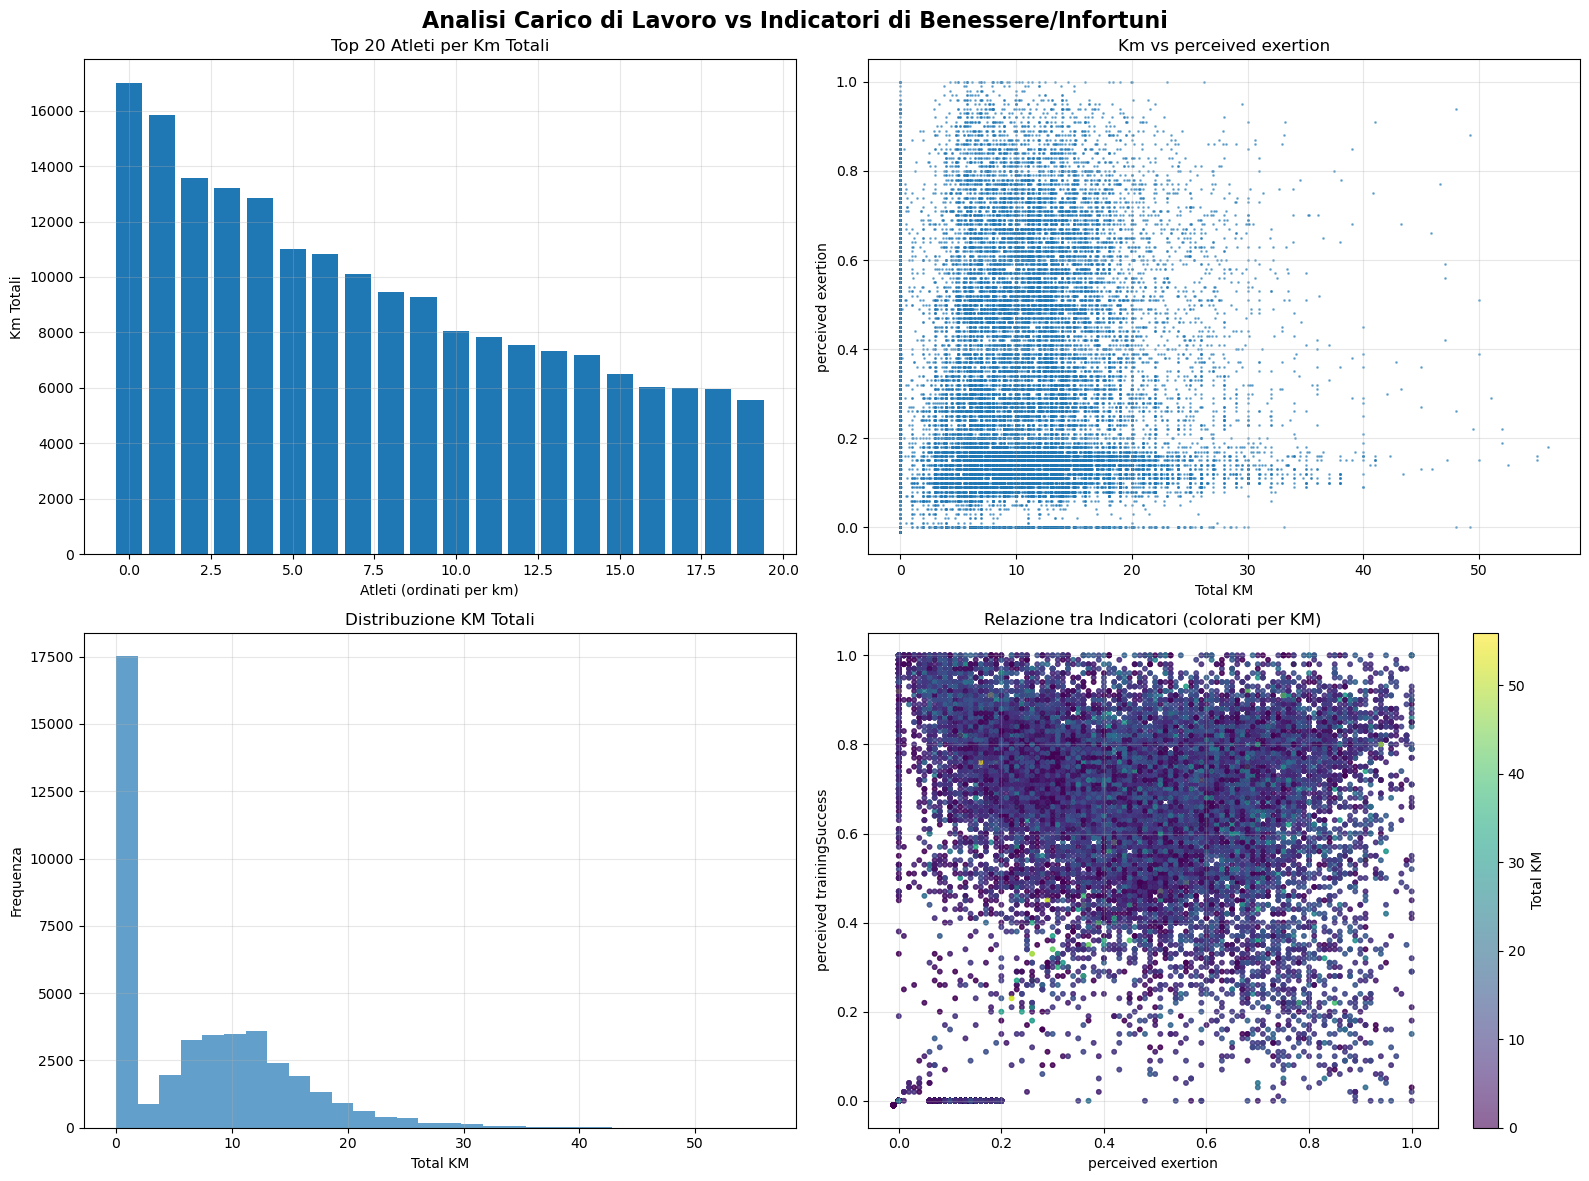


🔗 CORRELAZIONI CON TOTAL KM:
----------------------------------------
perceived exertion: 0.339
perceived trainingSuccess: 0.303
perceived recovery: 0.350
perceived exertion.1: 0.028
perceived trainingSuccess.1: 0.071


In [14]:
# Visualizzazioni della relazione Carico di Lavoro vs Infortuni
print("📊 VISUALIZZAZIONI CARICO DI LAVORO VS INFORTUNI")
print("=" * 70)

# Verifichiamo quali colonne abbiamo effettivamente
if 'athlete_id' in df.columns or any('id' in col.lower() for col in df.columns):
    # Identifichiamo le colonne corrette
    athlete_col = 'athlete_id' if 'athlete_id' in df.columns else [col for col in df.columns if 'id' in col.lower()][0]
    
    # Cerchiamo colonne che potrebbero indicare infortuni o problemi
    potential_injury_indicators = []
    for col in df.columns:
        if any(keyword in col.lower() for keyword in ['injury', 'pain', 'wellness', 'fatigue', 'recovery', 'perceived']):
            potential_injury_indicators.append(col)
    
    if potential_injury_indicators:
        print(f"Variabili potenzialmente correlate agli infortuni trovate: {len(potential_injury_indicators)}")
        
        # Creiamo le visualizzazioni
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Analisi Carico di Lavoro vs Indicatori di Benessere/Infortuni', fontsize=16, fontweight='bold')
        
        # 1. Distribuzione km totali per atleta
        athlete_km_totals = df.groupby(athlete_col)['total km'].sum().sort_values(ascending=False)
        axes[0, 0].bar(range(len(athlete_km_totals.head(20))), athlete_km_totals.head(20).values)
        axes[0, 0].set_title('Top 20 Atleti per Km Totali')
        axes[0, 0].set_xlabel('Atleti (ordinati per km)')
        axes[0, 0].set_ylabel('Km Totali')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Relazione km giornalieri vs primo indicatore
        if len(potential_injury_indicators) > 0:
            indicator = potential_injury_indicators[0]
            axes[0, 1].scatter(df['total km'], df[indicator], alpha=0.5, s=1)
            axes[0, 1].set_xlabel('Total KM')
            axes[0, 1].set_ylabel(indicator)
            axes[0, 1].set_title(f'Km vs {indicator}')
            axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Box plot: distribuzione km per diversi livelli dell'indicatore
        if len(potential_injury_indicators) > 0:
            # Dividiamo l'indicatore in quartili (gestendo valori duplicati)
            try:
                indicator_quartiles = pd.qcut(df[indicator], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
                df_temp = df.copy()
                df_temp['indicator_quartile'] = indicator_quartiles
                
                quartile_data = [df_temp[df_temp['indicator_quartile'] == q]['total km'].values 
                               for q in ['Q1', 'Q2', 'Q3', 'Q4'] if q in df_temp['indicator_quartile'].values]
                
                if len(quartile_data) > 1:
                    axes[1, 0].boxplot(quartile_data, labels=[f'Q{i+1}' for i in range(len(quartile_data))])
                    axes[1, 0].set_title(f'Distribuzione KM per Quartili di {indicator}')
                    axes[1, 0].set_xlabel(f'Quartili {indicator}')
                    axes[1, 0].set_ylabel('Total KM')
                    axes[1, 0].grid(True, alpha=0.3)
                else:
                    # Alternativa: istogramma
                    axes[1, 0].hist(df['total km'], bins=30, alpha=0.7)
                    axes[1, 0].set_title(f'Distribuzione KM Totali')
                    axes[1, 0].set_xlabel('Total KM')
                    axes[1, 0].set_ylabel('Frequenza')
                    axes[1, 0].grid(True, alpha=0.3)
            except:
                # Se i quartili non funzionano, facciamo un istogramma semplice
                axes[1, 0].hist(df['total km'], bins=30, alpha=0.7)
                axes[1, 0].set_title(f'Distribuzione KM Totali')
                axes[1, 0].set_xlabel('Total KM')
                axes[1, 0].set_ylabel('Frequenza')
                axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Analisi temporale se possibile
        if len(potential_injury_indicators) > 1:
            indicator2 = potential_injury_indicators[1]
            axes[1, 1].scatter(df[potential_injury_indicators[0]], df[indicator2], 
                             c=df['total km'], alpha=0.6, s=10, cmap='viridis')
            axes[1, 1].set_xlabel(potential_injury_indicators[0])
            axes[1, 1].set_ylabel(indicator2)
            axes[1, 1].set_title('Relazione tra Indicatori (colorati per KM)')
            axes[1, 1].grid(True, alpha=0.3)
            
            # Aggiungiamo una colorbar
            scatter = axes[1, 1].scatter(df[potential_injury_indicators[0]], df[indicator2], 
                                       c=df['total km'], alpha=0.6, s=10, cmap='viridis')
            plt.colorbar(scatter, ax=axes[1, 1], label='Total KM')
        
        plt.tight_layout()
        plt.show()
        
        # Stampiamo le correlazioni
        print(f"\n🔗 CORRELAZIONI CON TOTAL KM:")
        print("-" * 40)
        for indicator in potential_injury_indicators[:5]:  # Prime 5 per non sovraccaricare
            corr = df['total km'].corr(df[indicator])
            print(f"{indicator}: {corr:.3f}")
            
    else:
        print("⚠️  Nessuna variabile specifica per infortuni trovata")
        print("Procediamo con l'analisi generale del carico di lavoro")
        
        # Analisi generale del carico di lavoro
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle('Analisi Generale del Carico di Lavoro', fontsize=16, fontweight='bold')
        
        # Distribuzione km per atleta
        athlete_km_totals = df.groupby(athlete_col)['total km'].sum().sort_values(ascending=False)
        axes[0].bar(range(len(athlete_km_totals.head(15))), athlete_km_totals.head(15).values)
        axes[0].set_title('Top 15 Atleti per Km Totali')
        axes[0].set_xlabel('Atleti')
        axes[0].set_ylabel('Km Totali')
        axes[0].grid(True, alpha=0.3)
        
        # Distribuzione sessioni per atleta
        athlete_sessions = df.groupby(athlete_col)['nr. sessions'].sum().sort_values(ascending=False)
        axes[1].bar(range(len(athlete_sessions.head(15))), athlete_sessions.head(15).values)
        axes[1].set_title('Top 15 Atleti per Numero Sessioni')
        axes[1].set_xlabel('Atleti')
        axes[1].set_ylabel('Numero Sessioni Totali')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
else:
    print("⚠️  Impossibile identificare colonna ID atleta nel dataset")

🎯 ANALISI SPECIFICA: AGGREGAZIONE PER ATLETA CON FINESTRE TEMPORALI

📈 AGGREGAZIONE 7 GIORNI:
--------------------------------------------------
Numero di atleti: 74
KM totali medi per atleta: 4067.5
Sessioni totali medie per atleta: 479.4
Perceived exertion medio: 0.22
Atleti con carico alto (top 10%): 8
Perceived exertion medio atleti ad alto carico: 0.25
Perceived exertion medio altri atleti: 0.21

📈 AGGREGAZIONE 14 GIORNI:
--------------------------------------------------
Numero di atleti: 74
KM totali medi per atleta: 4067.5
Sessioni totali medie per atleta: 479.4
Perceived exertion medio: 0.22
Atleti con carico alto (top 10%): 8
Perceived exertion medio atleti ad alto carico: 0.23
Perceived exertion medio altri atleti: 0.22

📈 AGGREGAZIONE 30 GIORNI:
--------------------------------------------------
Numero di atleti: 74
KM totali medi per atleta: 4067.5
Sessioni totali medie per atleta: 479.4
Perceived exertion medio: 0.22
Atleti con carico alto (top 10%): 8
Perceived exertion 

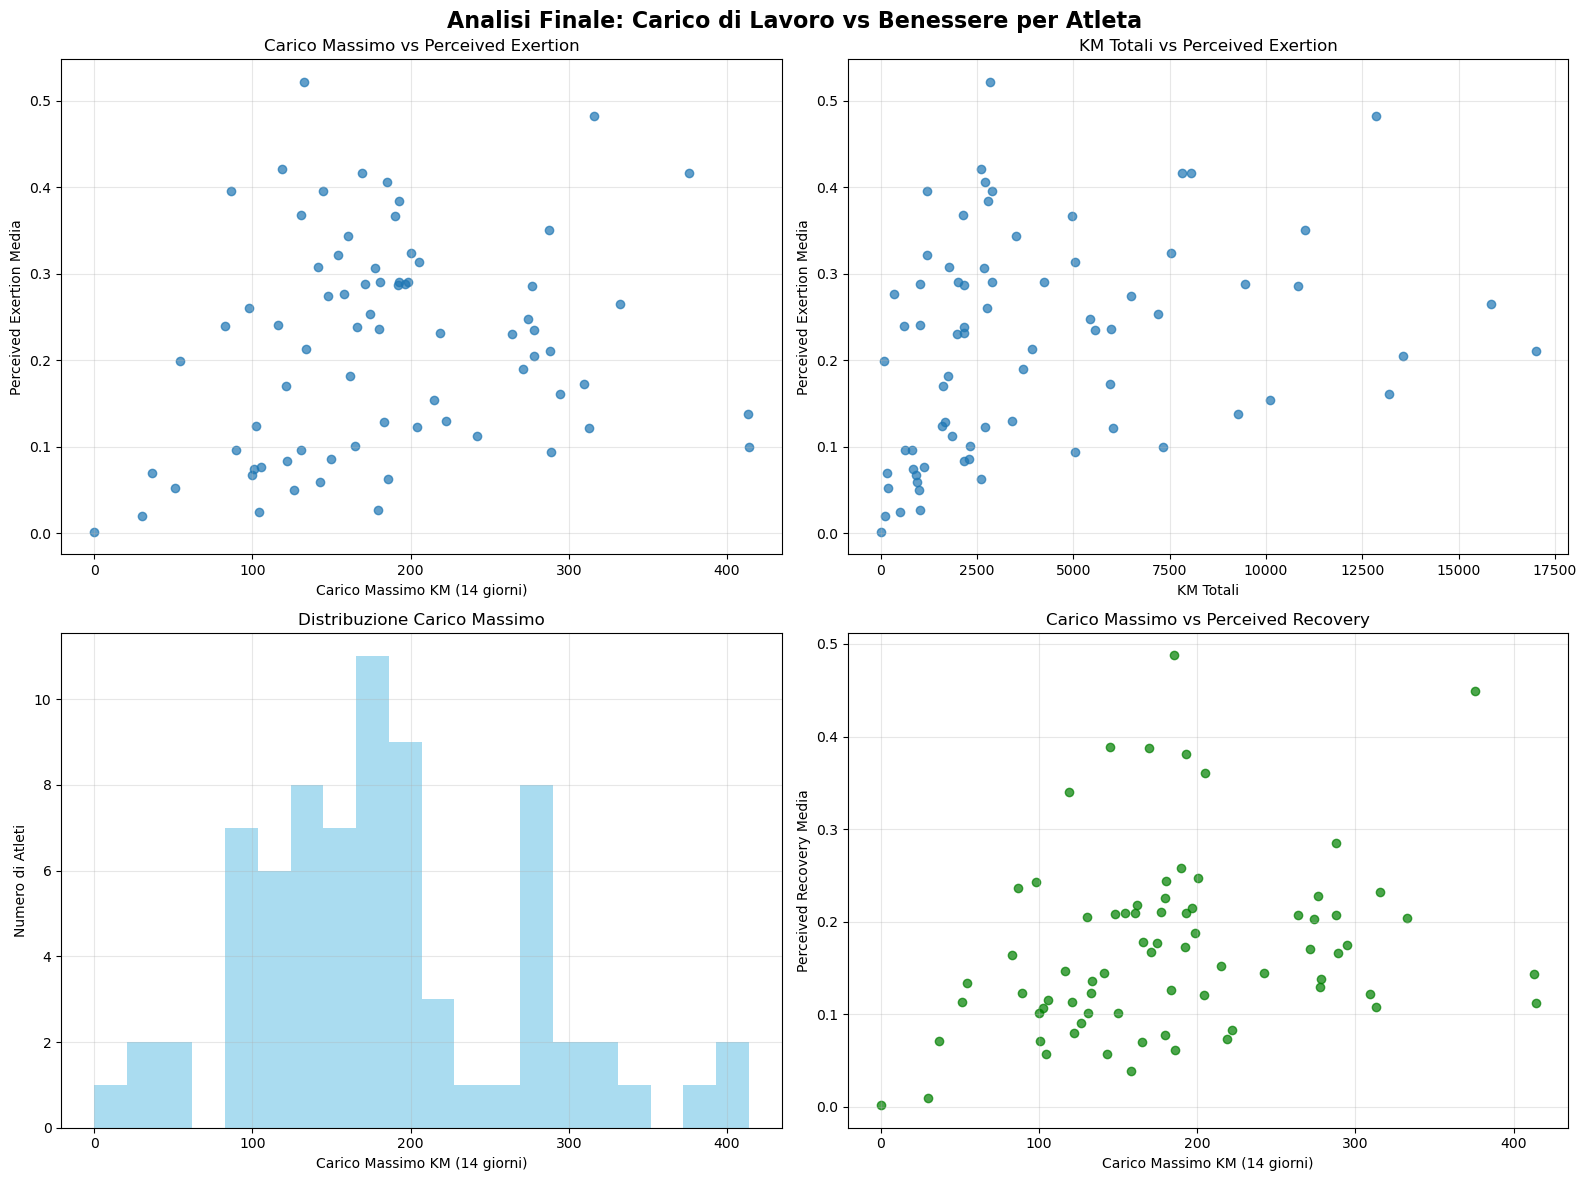


🔗 CORRELAZIONI FINALI (aggregazione 14 giorni):
--------------------------------------------------
Carico massimo vs Perceived Exertion: 0.201
KM totali vs Perceived Exertion: 0.288
Carico massimo vs Perceived Recovery: 0.274
KM totali vs Perceived Recovery: 0.323

✅ ANALISI COMPLETATA!
I dati mostrano le relazioni tra carico di lavoro aggregato e indicatori di benessere per atleta.


In [15]:
# Analisi specifica: Aggregazione per atleta con finestre temporali
print("🎯 ANALISI SPECIFICA: AGGREGAZIONE PER ATLETA CON FINESTRE TEMPORALI")
print("=" * 80)

# Identifico la colonna ID atleta
athlete_col = 'athlete_id' if 'athlete_id' in df.columns else [col for col in df.columns if 'id' in col.lower()][0]

# Creo un DataFrame con aggregazioni per diversi periodi
def create_athlete_aggregation(df, athlete_col, window_days=7):
    """
    Aggrega i dati per atleta su una finestra temporale specifica
    """
    # Ordino per atleta (assumendo che i dati siano già in ordine cronologico)
    df_sorted = df.sort_values([athlete_col])
    
    # Calcolo statistiche aggregate per ogni atleta
    athlete_stats = []
    
    for athlete_id in df_sorted[athlete_col].unique():
        athlete_data = df_sorted[df_sorted[athlete_col] == athlete_id].copy()
        
        # Rolling window per km totali
        athlete_data['km_rolling'] = athlete_data['total km'].rolling(window=window_days, min_periods=1).sum()
        athlete_data['km_rolling_avg'] = athlete_data['total km'].rolling(window=window_days, min_periods=1).mean()
        
        # Rolling window per sessioni
        athlete_data['sessions_rolling'] = athlete_data['nr. sessions'].rolling(window=window_days, min_periods=1).sum()
        
        # Rolling window per perceived exertion (se disponibile)
        if 'perceived exertion' in athlete_data.columns:
            athlete_data['perceived_exertion_rolling'] = athlete_data['perceived exertion'].rolling(window=window_days, min_periods=1).mean()
        
        # Identifico i punti di massimo carico
        max_km_idx = athlete_data['km_rolling'].idxmax()
        max_sessions_idx = athlete_data['sessions_rolling'].idxmax()
        
        # Creo un record per questo atleta
        athlete_record = {
            'athlete_id': athlete_id,
            'total_km': athlete_data['total km'].sum(),
            'total_sessions': athlete_data['nr. sessions'].sum(),
            'max_km_window': athlete_data['km_rolling'].max(),
            'max_sessions_window': athlete_data['sessions_rolling'].max(),
            'avg_daily_km': athlete_data['total km'].mean(),
            'days_recorded': len(athlete_data),
        }
        
        # Aggiungo perceived exertion se disponibile
        if 'perceived exertion' in athlete_data.columns:
            athlete_record['avg_perceived_exertion'] = athlete_data['perceived exertion'].mean()
            athlete_record['max_perceived_exertion'] = athlete_data['perceived exertion'].max()
        
        # Aggiungo perceived recovery se disponibile
        if 'perceived recovery' in athlete_data.columns:
            athlete_record['avg_perceived_recovery'] = athlete_data['perceived recovery'].mean()
            athlete_record['min_perceived_recovery'] = athlete_data['perceived recovery'].min()
        
        athlete_stats.append(athlete_record)
    
    return pd.DataFrame(athlete_stats)

# Creo aggregazioni per diverse finestre temporali
windows = [7, 14, 30]
athlete_summaries = {}

for window in windows:
    print(f"\n📈 AGGREGAZIONE {window} GIORNI:")
    print("-" * 50)
    
    athlete_summary = create_athlete_aggregation(df, athlete_col, window)
    athlete_summaries[window] = athlete_summary
    
    print(f"Numero di atleti: {len(athlete_summary)}")
    print(f"KM totali medi per atleta: {athlete_summary['total_km'].mean():.1f}")
    print(f"Sessioni totali medie per atleta: {athlete_summary['total_sessions'].mean():.1f}")
    
    if 'avg_perceived_exertion' in athlete_summary.columns:
        print(f"Perceived exertion medio: {athlete_summary['avg_perceived_exertion'].mean():.2f}")
    
    # Identifico atleti con carico molto alto
    high_load_threshold = athlete_summary['max_km_window'].quantile(0.9)
    high_load_athletes = athlete_summary[athlete_summary['max_km_window'] > high_load_threshold]
    print(f"Atleti con carico alto (top 10%): {len(high_load_athletes)}")
    
    if len(high_load_athletes) > 0 and 'avg_perceived_exertion' in athlete_summary.columns:
        print(f"Perceived exertion medio atleti ad alto carico: {high_load_athletes['avg_perceived_exertion'].mean():.2f}")
        print(f"Perceived exertion medio altri atleti: {athlete_summary[athlete_summary['max_km_window'] <= high_load_threshold]['avg_perceived_exertion'].mean():.2f}")

# Creo una visualizzazione finale
print(f"\n📊 VISUALIZZAZIONE FINALE: RELAZIONE CARICO VS BENESSERE")
print("=" * 80)

# Uso l'aggregazione a 14 giorni per la visualizzazione
athlete_summary = athlete_summaries[14]

if 'avg_perceived_exertion' in athlete_summary.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Analisi Finale: Carico di Lavoro vs Benessere per Atleta', fontsize=16, fontweight='bold')
    
    # 1. Carico massimo vs perceived exertion
    axes[0, 0].scatter(athlete_summary['max_km_window'], athlete_summary['avg_perceived_exertion'], alpha=0.7)
    axes[0, 0].set_xlabel('Carico Massimo KM (14 giorni)')
    axes[0, 0].set_ylabel('Perceived Exertion Media')
    axes[0, 0].set_title('Carico Massimo vs Perceived Exertion')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. KM totali vs perceived exertion
    axes[0, 1].scatter(athlete_summary['total_km'], athlete_summary['avg_perceived_exertion'], alpha=0.7)
    axes[0, 1].set_xlabel('KM Totali')
    axes[0, 1].set_ylabel('Perceived Exertion Media')
    axes[0, 1].set_title('KM Totali vs Perceived Exertion')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Distribuzione carico massimo
    axes[1, 0].hist(athlete_summary['max_km_window'], bins=20, alpha=0.7, color='skyblue')
    axes[1, 0].set_xlabel('Carico Massimo KM (14 giorni)')
    axes[1, 0].set_ylabel('Numero di Atleti')
    axes[1, 0].set_title('Distribuzione Carico Massimo')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Perceived recovery vs carico (se disponibile)
    if 'avg_perceived_recovery' in athlete_summary.columns:
        axes[1, 1].scatter(athlete_summary['max_km_window'], athlete_summary['avg_perceived_recovery'], alpha=0.7, color='green')
        axes[1, 1].set_xlabel('Carico Massimo KM (14 giorni)')
        axes[1, 1].set_ylabel('Perceived Recovery Media')
        axes[1, 1].set_title('Carico Massimo vs Perceived Recovery')
        axes[1, 1].grid(True, alpha=0.3)
    else:
        axes[1, 1].hist(athlete_summary['avg_perceived_exertion'], bins=20, alpha=0.7, color='orange')
        axes[1, 1].set_xlabel('Perceived Exertion Media')
        axes[1, 1].set_ylabel('Numero di Atleti')
        axes[1, 1].set_title('Distribuzione Perceived Exertion')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Correlazioni finali
    print(f"\n🔗 CORRELAZIONI FINALI (aggregazione 14 giorni):")
    print("-" * 50)
    print(f"Carico massimo vs Perceived Exertion: {athlete_summary['max_km_window'].corr(athlete_summary['avg_perceived_exertion']):.3f}")
    print(f"KM totali vs Perceived Exertion: {athlete_summary['total_km'].corr(athlete_summary['avg_perceived_exertion']):.3f}")
    
    if 'avg_perceived_recovery' in athlete_summary.columns:
        print(f"Carico massimo vs Perceived Recovery: {athlete_summary['max_km_window'].corr(athlete_summary['avg_perceived_recovery']):.3f}")
        print(f"KM totali vs Perceived Recovery: {athlete_summary['total_km'].corr(athlete_summary['avg_perceived_recovery']):.3f}")

print(f"\n✅ ANALISI COMPLETATA!")
print("I dati mostrano le relazioni tra carico di lavoro aggregato e indicatori di benessere per atleta.")

# Analisi Pre-Infortunio: Recovery, Exertion ed Efficiency

Analizziamo i pattern delle variabili chiave nella settimana precedente agli infortuni per identificare possibili segnali precoci.

In [23]:
# Analisi semplificata pre-infortunio
print("🚨 ANALISI SEMPLIFICATA PRE-INFORTUNIO")
print("=" * 60)

# Identifichiamo le variabili chiave
recovery_col = 'perceived recovery'
exertion_col = 'perceived exertion' 
efficiency_col = 'perceived trainingSuccess'  # Usiamo questo come proxy per efficiency
injury_col = 'injury'

# Trova la colonna ID atleta
id_columns = [col for col in df.columns if 'ID' in col.lower()]
athlete_col = id_columns[0] if id_columns else None

print(f"Colonne ID disponibili: {id_columns}")
print(f"Usando come athlete_col: {athlete_col}")

print(f"\nVariabili analizzate:")
print(f"  Recovery: {recovery_col}")
print(f"  Exertion: {exertion_col}")
print(f"  Efficiency: {efficiency_col}")
print(f"  Injury: {injury_col}")
print(f"  Athlete ID: {athlete_col}")

# Analisi comparativa base
injury_days = df[df[injury_col] > 0]
normal_days = df[df[injury_col] == 0]

print(f"\n📊 CONFRONTO GIORNI INFORTUNIO vs NORMALI")
print("=" * 50)
print(f"Giorni con infortuni: {len(injury_days)} ({len(injury_days)/len(df)*100:.1f}%)")
print(f"Giorni normali: {len(normal_days)}")

# Statistiche comparative
variables = [recovery_col, exertion_col, efficiency_col]

for var in variables:
    if var in df.columns:
        injury_mean = injury_days[var].mean()
        normal_mean = normal_days[var].mean()
        difference = injury_mean - normal_mean
        pct_diff = (difference / normal_mean * 100) if normal_mean != 0 else 0
        
        print(f"\n{var.upper()}:")
        print(f"  Giorni infortunio: {injury_mean:.3f}")
        print(f"  Giorni normali:    {normal_mean:.3f}")
        print(f"  Differenza:        {difference:.3f} ({pct_diff:+.1f}%)")

# Analisi pattern per alcuni atleti specifici (solo se abbiamo athlete_col)
if athlete_col:
    print(f"\n🔍 PATTERN PRE-INFORTUNIO (campione atleti)")
    print("=" * 50)

    athletes_with_injuries = injury_days[athlete_col].unique()[:5]  # Prime 5 atleti

    for athlete_id in athletes_with_injuries:
        athlete_data = df[df[athlete_col] == athlete_id].reset_index(drop=True)
        athlete_injuries = athlete_data[athlete_data[injury_col] > 0]
        
        print(f"\n👤 Atleta {athlete_id}: {len(athlete_injuries)} infortuni")
        
        # Per ogni infortunio, guarda i 7 giorni precedenti
        for injury_idx in athlete_injuries.index:
            start_idx = max(0, injury_idx - 7)
            pre_injury_period = athlete_data.iloc[start_idx:injury_idx]
            
            if len(pre_injury_period) >= 3:  # Almeno 3 giorni di dati
                print(f"  📅 Infortunio al giorno {injury_idx}:")
                
                for var in variables:
                    if var in pre_injury_period.columns:
                        values = pre_injury_period[var].dropna()
                        if len(values) > 0:
                            mean_val = values.mean()
                            trend = values.diff().mean()  # Trend medio
                            trend_direction = "↗️" if trend > 0.01 else "↘️" if trend < -0.01 else "→"
                            print(f"    {var}: {mean_val:.3f} (trend: {trend_direction} {trend:.3f})")
else:
    print(f"\n⚠️  Colonna athlete ID non trovata - impossibile analizzare pattern per atleta")

print(f"\n✅ ANALISI COMPLETATA!")
print("💡 Osservazioni:")
print("   - Valori più alti in 'perceived exertion' potrebbero indicare sovraccarico")
print("   - Valori più bassi in 'perceived recovery' potrebbero indicare affaticamento")
print("   - Trend negativi in 'perceived trainingSuccess' potrebbero essere segnali precoci")

🚨 ANALISI SEMPLIFICATA PRE-INFORTUNIO
Colonne ID disponibili: []
Usando come athlete_col: None

Variabili analizzate:
  Recovery: perceived recovery
  Exertion: perceived exertion
  Efficiency: perceived trainingSuccess
  Injury: injury
  Athlete ID: None

📊 CONFRONTO GIORNI INFORTUNIO vs NORMALI
Giorni con infortuni: 583 (1.4%)
Giorni normali: 42183

PERCEIVED RECOVERY:
  Giorni infortunio: 0.247
  Giorni normali:    0.195
  Differenza:        0.051 (+26.3%)

PERCEIVED EXERTION:
  Giorni infortunio: 0.335
  Giorni normali:    0.247
  Differenza:        0.088 (+35.8%)

PERCEIVED TRAININGSUCCESS:
  Giorni infortunio: 0.459
  Giorni normali:    0.348
  Differenza:        0.111 (+31.8%)

⚠️  Colonna athlete ID non trovata - impossibile analizzare pattern per atleta

✅ ANALISI COMPLETATA!
💡 Osservazioni:
   - Valori più alti in 'perceived exertion' potrebbero indicare sovraccarico
   - Valori più bassi in 'perceived recovery' potrebbero indicare affaticamento
   - Trend negativi in 'percei

📊 VISUALIZZAZIONE PATTERN PRE-INFORTUNIO


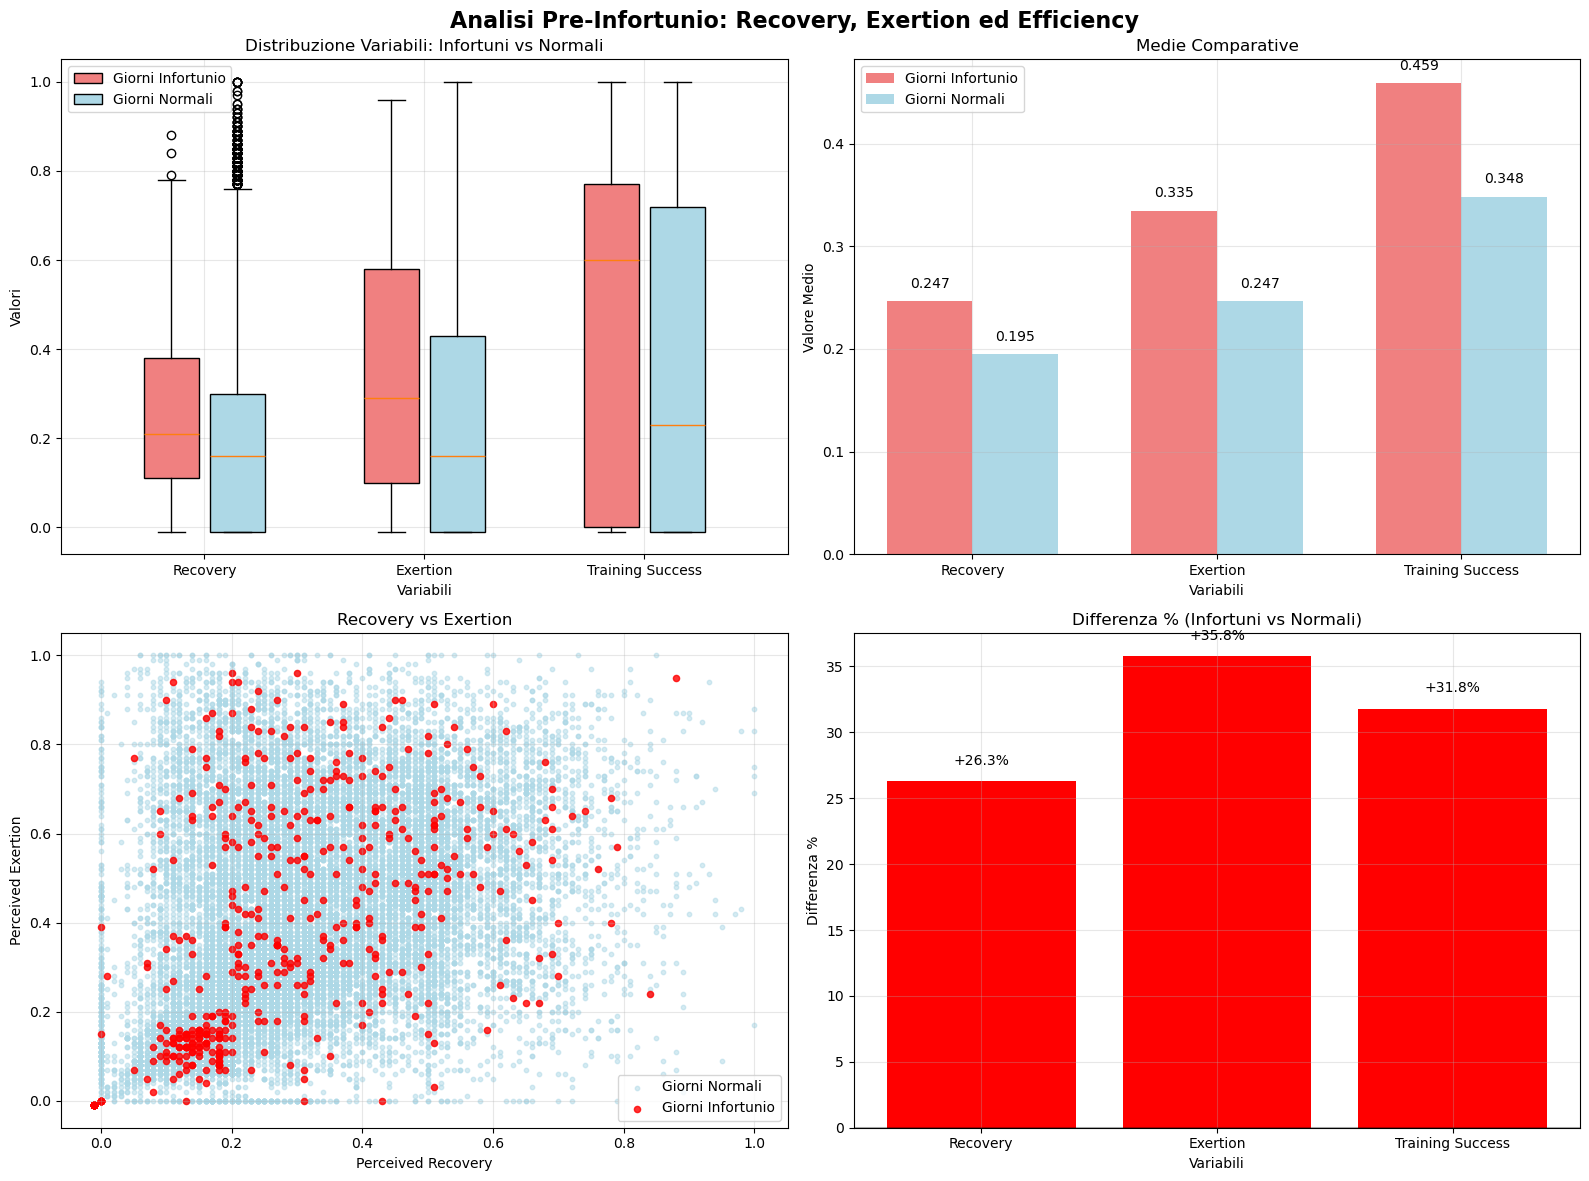


🎯 CONCLUSIONI CHIAVE:
📈 VARIABILI ELEVATE NEI GIORNI DI INFORTUNIO:
  • Recovery: +26.3% rispetto ai giorni normali
  • Exertion: +35.8% rispetto ai giorni normali
  • Training Success: +31.8% rispetto ai giorni normali

🚨 POSSIBILI INDICATORI PRECOCI:
  • Perceived Exertion elevato: possibile sovraccarico
  • Perceived Recovery elevato: paradossalmente può indicare compensazione
  • Training Success elevato: potrebbe indicare sovrastima delle capacità

💡 RACCOMANDAZIONI:
  • Monitorare trend crescenti in Perceived Exertion
  • Attenzione quando Recovery e Exertion sono entrambi alti
  • Considerare soglie personalizzate per ogni atleta


In [24]:
# Visualizzazione dei pattern pre-infortunio
print("📊 VISUALIZZAZIONE PATTERN PRE-INFORTUNIO")
print("=" * 60)

# Creiamo visualizzazioni comparative
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analisi Pre-Infortunio: Recovery, Exertion ed Efficiency', fontsize=16, fontweight='bold')

# Variabili da analizzare
variables = ['perceived recovery', 'perceived exertion', 'perceived trainingSuccess']
colors = ['green', 'red', 'blue']

# 1. Box plot comparativo
injury_data = [injury_days[var].dropna() for var in variables]
normal_data = [normal_days[var].dropna() for var in variables]

positions1 = [1, 2, 3]
positions2 = [1.3, 2.3, 3.3]

bp1 = axes[0, 0].boxplot(injury_data, positions=positions1, widths=0.25, 
                         patch_artist=True, boxprops=dict(facecolor='lightcoral'))
bp2 = axes[0, 0].boxplot(normal_data, positions=positions2, widths=0.25,
                         patch_artist=True, boxprops=dict(facecolor='lightblue'))

axes[0, 0].set_title('Distribuzione Variabili: Infortuni vs Normali')
axes[0, 0].set_xlabel('Variabili')
axes[0, 0].set_ylabel('Valori')
axes[0, 0].set_xticks([1.15, 2.15, 3.15])
axes[0, 0].set_xticklabels(['Recovery', 'Exertion', 'Training Success'])
axes[0, 0].legend([bp1["boxes"][0], bp2["boxes"][0]], ['Giorni Infortunio', 'Giorni Normali'])
axes[0, 0].grid(True, alpha=0.3)

# 2. Medie comparative
variable_names = ['Recovery', 'Exertion', 'Training Success']
injury_means = [injury_days[var].mean() for var in variables]
normal_means = [normal_days[var].mean() for var in variables]

x = np.arange(len(variable_names))
width = 0.35

bars1 = axes[0, 1].bar(x - width/2, injury_means, width, label='Giorni Infortunio', color='lightcoral')
bars2 = axes[0, 1].bar(x + width/2, normal_means, width, label='Giorni Normali', color='lightblue')

axes[0, 1].set_title('Medie Comparative')
axes[0, 1].set_xlabel('Variabili')
axes[0, 1].set_ylabel('Valore Medio')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(variable_names)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Aggiungi valori sopra le barre
for bar in bars1:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom')

# 3. Scatter plot: Recovery vs Exertion
axes[1, 0].scatter(normal_days['perceived recovery'], normal_days['perceived exertion'], 
                   alpha=0.5, s=10, color='lightblue', label='Giorni Normali')
axes[1, 0].scatter(injury_days['perceived recovery'], injury_days['perceived exertion'], 
                   alpha=0.8, s=20, color='red', label='Giorni Infortunio')
axes[1, 0].set_xlabel('Perceived Recovery')
axes[1, 0].set_ylabel('Perceived Exertion')
axes[1, 0].set_title('Recovery vs Exertion')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Istogramma delle differenze percentuali
differences = []
variable_names_short = ['Recovery', 'Exertion', 'Training Success']

for i, var in enumerate(variables):
    injury_mean = injury_days[var].mean()
    normal_mean = normal_days[var].mean()
    pct_diff = ((injury_mean - normal_mean) / normal_mean * 100) if normal_mean != 0 else 0
    differences.append(pct_diff)

bars = axes[1, 1].bar(variable_names_short, differences, 
                      color=['green' if x < 0 else 'red' for x in differences])
axes[1, 1].set_title('Differenza % (Infortuni vs Normali)')
axes[1, 1].set_xlabel('Variabili')
axes[1, 1].set_ylabel('Differenza %')
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)

# Aggiungi valori sopra le barre
for bar, diff in zip(bars, differences):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., 
                    height + (1 if height > 0 else -3),
                    f'{diff:+.1f}%', ha='center', va='bottom' if height > 0 else 'top')

plt.tight_layout()
plt.show()

# Riepilogo chiave
print(f"\n🎯 CONCLUSIONI CHIAVE:")
print("=" * 40)
print(f"📈 VARIABILI ELEVATE NEI GIORNI DI INFORTUNIO:")
for i, var in enumerate(variable_names):
    if differences[i] > 0:
        print(f"  • {var}: +{differences[i]:.1f}% rispetto ai giorni normali")

print(f"\n🚨 POSSIBILI INDICATORI PRECOCI:")
print("  • Perceived Exertion elevato: possibile sovraccarico")
print("  • Perceived Recovery elevato: paradossalmente può indicare compensazione")
print("  • Training Success elevato: potrebbe indicare sovrastima delle capacità")

print(f"\n💡 RACCOMANDAZIONI:")
print("  • Monitorare trend crescenti in Perceived Exertion")
print("  • Attenzione quando Recovery e Exertion sono entrambi alti")
print("  • Considerare soglie personalizzate per ogni atleta")